In [117]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

try:
    import seaborn as sns
except ImportError:
    print('Seaborn is not installed')
%matplotlib inline

from tyssue import Sheet, config
from tyssue import SheetGeometry as geom
from tyssue.generation import three_faces_sheet

from tyssue.draw import sheet_view
# Grab the default settings for drawing
draw_specs = config.draw.sheet_spec()

In [118]:
from tyssue.stores import stores_dir, stores_list
from tyssue.io import hdf5

print(stores_list)

['rod_sheet.hf5', '15_cells_patch.hf5', 'before_apoptosis.hf5', '__pycache__', 'planar_periodic8x8.hf5', '__init__.py', 'planar_periodic8x8.hdf5', 'small_hexagonal.hf5', 'small_ellipsoid.hf5']


In [119]:
import os
dsets = hdf5.load_datasets(os.path.join(stores_dir, stores_list[2]))

In [120]:
sheet = Sheet('cyl', dsets, config.geometry.cylindrical_sheet())

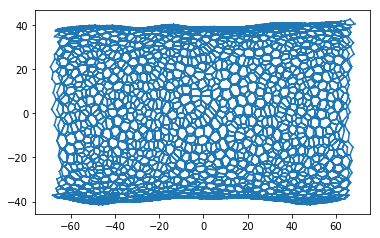

In [121]:
fig, ax = sheet_view(sheet, mode='quick', coords=['z', 'x'])

In [122]:
sheet.edge_df.duplicated(['srce', 'trgt']).any()

False

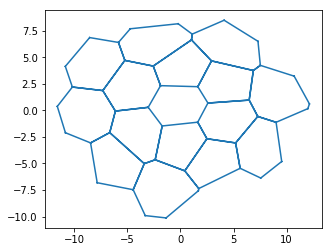

In [139]:
def face_centered_patch(sheet, face, neighbour_order):

    faces = sheet.get_neighborhood(face, order=neighbour_order)['face']
    edges = sheet.edge_df[sheet.edge_df['face'].isin(faces)]

    vertices = sheet.vert_df.loc[set(edges['srce'])]
    pos = vertices[sheet.coords].values - vertices[sheet.coords].mean(axis=0).values[None, :]
    u, v, rotation = np.linalg.svd(pos, full_matrices=False)
    rot_pos = pd.DataFrame(np.dot(pos, rotation.T), 
                           index=vertices.index,
                           columns=sheet.coords)

    patch_dset = {'vert': rot_pos,
                  'face': sheet.face_df.loc[faces].copy(),
                  'edge': edges.copy()}

    patch = Sheet('patch', patch_dset, sheet.specs)
    patch.reset_index()
    return patch

patch = face_centered_patch(sheet, 190, 2)
fig, ax = sheet_view(patch, mode='quick', coords=['x', 'y'])